### Classification ALgorithm  

> Data set = Magic Data Set,Classify gamma & Hydron Particle

### Data Cleaning

In [41]:
import pandas as pd

In [42]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [43]:
len(cols)

11

In [44]:
df = pd.read_csv("magic04.data",names=cols)

In [45]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [46]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [47]:
df.nunique() # target variable /op

,0
fLength,18643
fWidth,18200
fSize,7228
fConc,6410
fConc1,4421
fAsym,18704
fM3Long,18693
fM3Trans,18390
fAlpha,17981
fDist,18437


In [48]:
df['class'] # g - 0 ,h - 1

,class
0,g
1,g
2,g
3,g
4,g
...,...
19015,h
19016,h
19017,h
19018,h


In [49]:
int(True)

1

> Converting categorical data into numerical data ,why?computers are good at u nd

In [50]:
df['class']=(df['class']=='g').astype(int)  # 1= gamma , h=hydrow

In [51]:
df['class']

,class
0,1
1,1
2,1
3,1
4,1
...,...
19015,0
19016,0
19017,0
19018,0


In [52]:
df.duplicated().sum()

np.int64(115)

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.isnull().sum()

,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0
fDist,0


In [56]:
import matplotlib.pyplot as plt

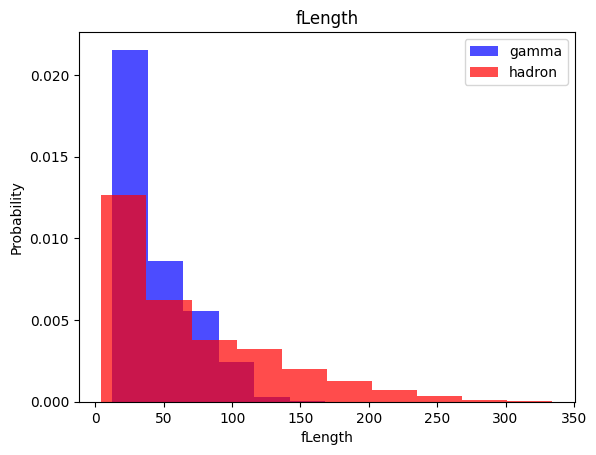

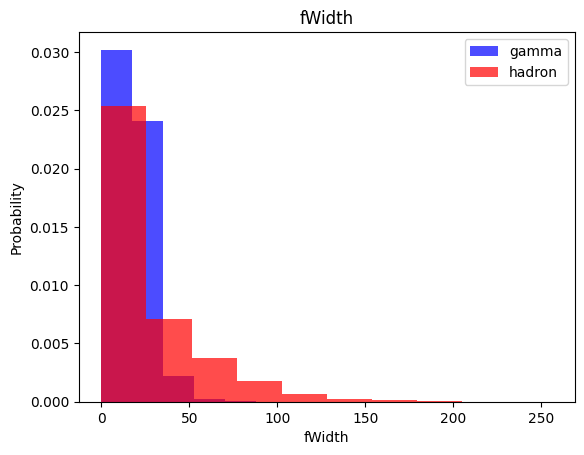

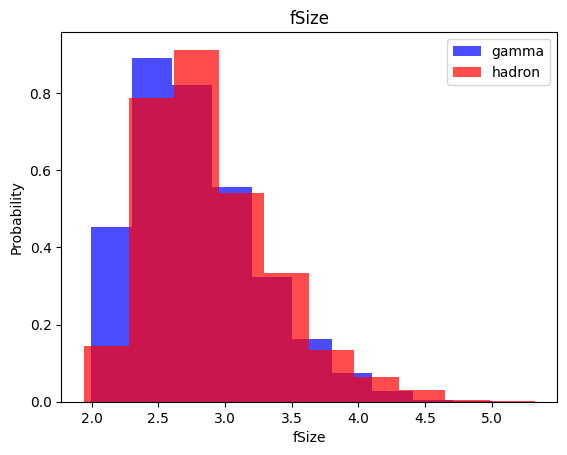

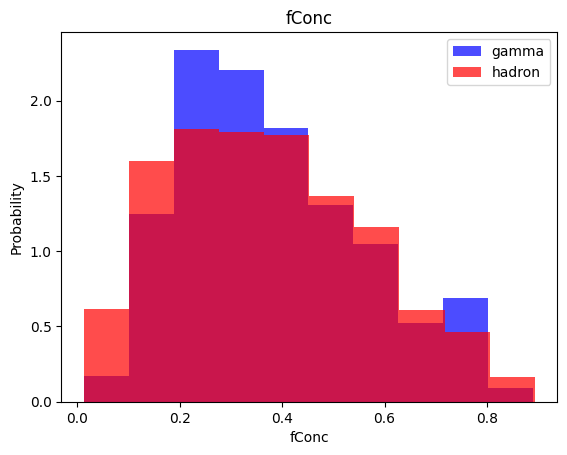

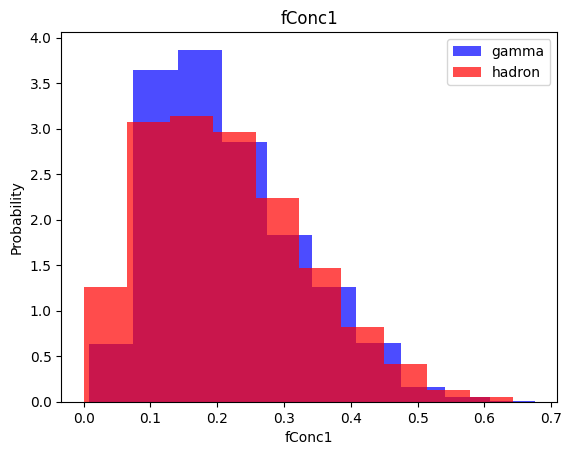

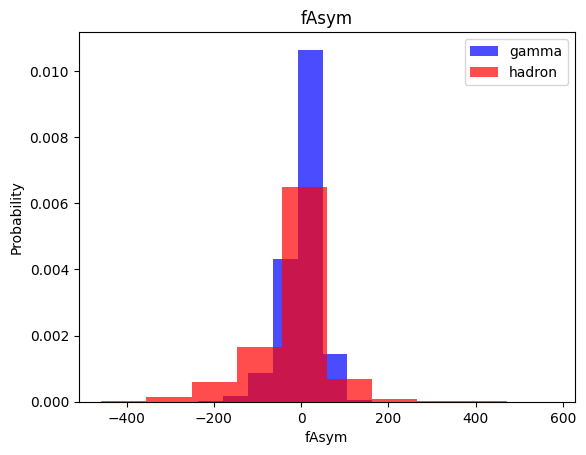

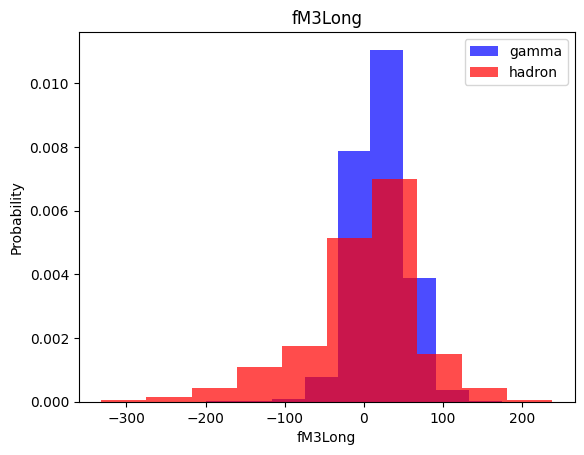

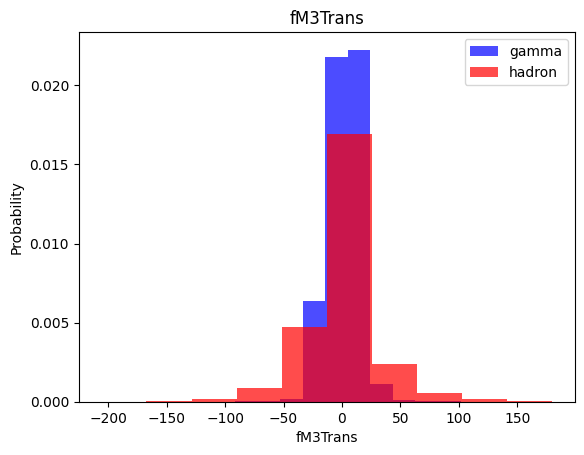

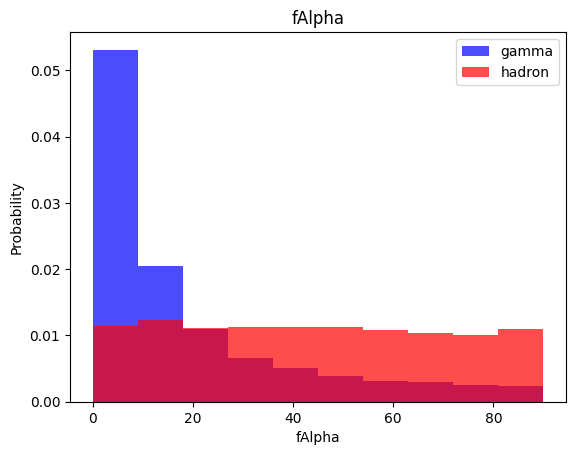

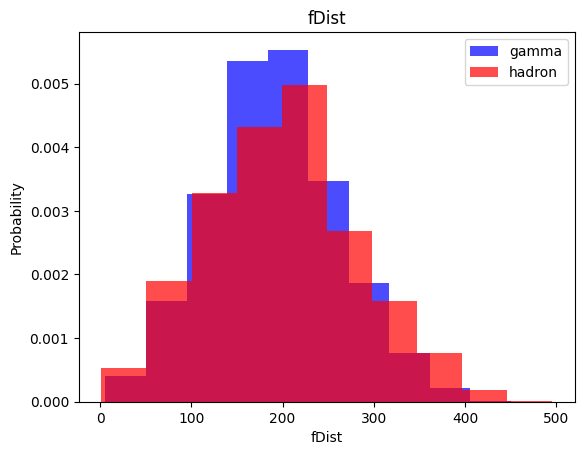

In [57]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [58]:
(df['class']==1).sum() # 12332 = gamma particles

np.int64(12332)

In [59]:
len(df)-12332 # 6573 = hydron particles

6573


#### Train ,Valid ,Test

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [61]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [63]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier #knn


In [65]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel


KNeighborsClassifier(n_neighbors=7)

In [66]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [67]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [68]:
knnpredict = knnmodel.predict(X_test)

### MODEL evaluate

> metric of performnace = accuracy

In [69]:
from sklearn.metrics import classification_report


## KNN Algorithm

In [70]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report

In [71]:
knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train,y_train)

knnmodelpred = knnmodel.predict(X_test) # this is predicted by model

In [72]:
knnmodelpred

array([0, 1, 1, ..., 0, 1, 1])

##### Evaluation Of the Model

In [73]:
print(classification_report(y_test,knnmodelpred))


              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1312
           1       0.82      0.89      0.85      2469

    accuracy                           0.80      3781
   macro avg       0.79      0.76      0.77      3781
weighted avg       0.80      0.80      0.80      3781



#### Having this accuracy is descent for the model which is relatively simple

* try with different value of k

### Naive Bayes Algoritm

In [74]:
from sklearn.naive_bayes import GaussianNB


In [75]:
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
nbpred = nbmodel.predict(X_test)

In [76]:
print(classification_report(y_test,nbpred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1312
           1       0.74      0.90      0.81      2469

    accuracy                           0.73      3781
   macro avg       0.71      0.66      0.66      3781
weighted avg       0.72      0.73      0.71      3781



##### this models accuracy is not that good  